<a href="https://colab.research.google.com/github/arturbernardo/estudos_ia/blob/main/ia_open_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sys
import numpy as np
import matplotlib

In [18]:
# Neuronio na unha
inputs = [1, 2, 2.1, 2.5]
weights = [3.1, 2.1, -0.5]
bias = 3

outputs = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
outputs

11.75

In [17]:
# Calculando camada neural na unha

inputs = [1, 2, 2.1, 2.5]

weights = [[3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0]]

biases = [1, 3, 0.5]

layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0
  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input+weight
  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)


[14.299999999999999, 16.299999999999997, 13.799999999999999]


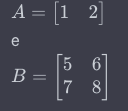

Multiplica-se desta forma:

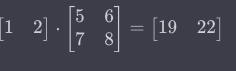

A ordem muda o resultado.
A matriz inicial define o formato da saída.
A matriz inicia deve ser "inclinada", com isso se multiplica 1x5 e 2x7, os valores se somam e temos o primeiro valor da resposta, 19.

In [19]:
matrix = [[1,2,3],
          [4,5,6]]

x = matrix * 3
x

[[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]]

In [22]:
matrix = [[1,2,3],
          [4,5,6]]

output = np.dot(3, matrix)
output

array([[ 3,  6,  9],
       [12, 15, 18]])

In [21]:
matrix = [[1,2,3],
          [4,5,6]]

output = np.dot([3,1], matrix)
output

array([ 7, 11, 15])

In [23]:
# dot é a multiplicação entre elementos que estão na mesma posição. input[x] * weights[x]
inputs = [1, 2, 2.1, 2.5]
weights = [3.1, 2.1, -0.5, 1.0]
biases = [1, 3, 0.5]

output = np.dot(weights, inputs) + bias
output

11.75

In [24]:
# Calculando camada neural com dot

inputs = [1, 2, 2.1, 2.5]

weights = [[3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0]]

biases = [1, 3, 0.5]
output = np.dot(weights, inputs) + bias

print(output)

[11.75 11.75 11.75]


In [ ]:
# Calculando camada neural com dot

inputs = [1, 2, 2.1, 2.5]

weights = [[3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0],
          [3.1, 2.1, -0.5, 1.0]]

biases = [1, 3, 0.5]
output = np.dot(weights, inputs) + bias

print(output)

# NN

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive


In [22]:
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
mnist_data = pd.read_csv('/content/drive/MyDrive/data/MINST/mnist_train.csv', encoding="ISO-8859-1", sep = ',')

In [24]:
mnist_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data = np.array(mnist_data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [36]:
Y_train

array([1, 8, 8, ..., 6, 9, 1])

In [37]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [38]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 1 6 ... 0 6 6] [1 8 8 ... 6 9 1]
0.07134019220664757
Iteration:  10
[3 0 3 ... 0 6 3] [1 8 8 ... 6 9 1]
0.14701944100747472
Iteration:  20
[3 0 3 ... 0 6 3] [1 8 8 ... 6 9 1]
0.19227444532958185
Iteration:  30
[3 0 3 ... 0 6 3] [1 8 8 ... 6 9 1]
0.2211732402244106
Iteration:  40
[6 0 3 ... 0 6 3] [1 8 8 ... 6 9 1]
0.2459194223630909
Iteration:  50
[1 1 3 ... 0 1 1] [1 8 8 ... 6 9 1]
0.28166579094560923
Iteration:  60
[1 1 6 ... 2 1 1] [1 8 8 ... 6 9 1]
0.31376802996660963
Iteration:  70
[1 1 6 ... 2 1 1] [1 8 8 ... 6 9 1]
0.3419888472685978
Iteration:  80
[1 3 6 ... 2 1 1] [1 8 8 ... 6 9 1]
0.3695316869777454
Iteration:  90
[1 3 3 ... 2 1 1] [1 8 8 ... 6 9 1]
0.3971762233258191
Iteration:  100
[1 8 3 ... 2 1 1] [1 8 8 ... 6 9 1]
0.42356650112713773
Iteration:  110
[1 8 3 ... 2 1 1] [1 8 8 ... 6 9 1]
0.44756690791369347
Iteration:  120
[1 8 3 ... 2 1 1] [1 8 8 ... 6 9 1]
0.47009271343582093
Iteration:  130
[1 8 3 ... 6 1 1] [1 8 8 ... 6 9 1]
0.48994050746622825
Iteratio

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

2.718281828459045

In [16]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

array([0.24243297, 0.65900114, 0.09856589])

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)